# Project: Investigate a Dataset (TMDb Movies )

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
In this dataset we would be analysis data from The Movie Database(TMDb) including user rating and revenue.We will be using this information given to the answer of our main question.


- **imdb_id**       -unique identification customer viewers      
- **popularity**       -number of people who have viewed and liked the movie.
- **budget**             -Estimated budget for all of the production process 
- **revenue**           -Estimated income from the production    
- **original_title**      -Name given to the movie  
- **cast**                  -Main actor in the movie
- **homepage**         -where to find the link to watch the movie 
- **director**             -Name of the artist around the movie creation
- **tagline**               -Brief explanation of the movie
- **keywords**          -some of the words used in the movie      
- **overview**         -General explanation of the movie plot
- **runtime**              -the amount of time required to air the movie (watching time)
- **genres**              -Classification of the movie as e.i. Action|Adventure|Science - --   Fiction|Thriller 
- **production**       -Companies –name of the company involved in the production.
- **release_date**  -start date for the original viewing.       
- **vote_count**        - Number of the viewers who participated in rating votes.     
- **vote_average**   -the average rate as the votes casted      
- **release_year**      -Year when the production was finished and opened for public views     
- **budget_adj**         - Estimated budget converted to dollars
- **revenue_adj**   -Estimated revenue converted to dollars     

In our analysis we will use functions like:
- *Mean*-to get the mean of different columns.
- *Describe* -to know statistical distributon of our data.
- *Info*-for data type details.
- *Shape*-to know the number of rows and columns in our data set.
- *Drop*- do delete some rows or lcolumns.
- We will use *histograms* and *scatter graph* for visualization of our data.

We will get to know the most profitable movie,the genre,the bugeting and the rating.This analysis will help in the planning levels for the future.we are going to do diffrent computations while answering the question below.<br>

<ol>
    
        
    1.  Which movie is the most popular?
    2.  Which movie has the highest revenue? 
    3.  What profit was made by the most popular movie?                                         
    4.  which genre is the most popular year by year? 
    5.  what profit was made from the popular genres?
    6.  What is the maximun movies runtime and its effect to votes counts ? 
        
    
<ol/>
    
                                                                


In [29]:
#import the packages to be used for our analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
sns.set_style('darkgrid')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

<a id='wrangling'></a>
## Data Wrangling

In this stage we are going ;
- To load our data.
- Inspect the data .
- And lastly figure out which chages we have to make.

### General Properties

In [30]:
#load the dataset be used for the analysis
df=pd.read_csv('tmdb-movies.csv')

#view the data
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [31]:
#lets get to know the size of our data sample
df.shape

(10866, 21)

In [32]:
#Lets find the summary of all columns the with their data types and 
#and including the number of non-null values in each column.
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [33]:
#lets check for statistical distribution of our data.
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [34]:
#lets check for any duplicate on the data
df.duplicated().value_counts()

False    10865
True         1
dtype: int64

## Data Cleaning 
- Our dataset has *one duplicates*that we will have to delete.<br>
- it contain some *missing values* with **homepage**,**tagline** and **keywords** as the most affected.<br>
- since they are columns that we won't need for this anlysis, **imdb_id ,director**, **overview**,**production _companies**,we will have to drop them.<br>
- From the out of decribe function,we have revenue and budget minimum has zero,we will have to get rid of those rows too.

**1 we are going to start by dropping some of the columns  that we are not going for this analysis.**

In [35]:
#so far am not going to use imdb_id,director,overview,production_companies,homepage,tagline and keywords,hence am doing to drop them.
df.drop(['imdb_id','overview','production_companies','homepage', 'tagline','keywords'], axis = 1,inplace=True)

#lets check the deleted columns 
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [36]:
#lets confirm if the is change in our columns from before
df.shape

(10866, 15)

- From the 21 colums from the original data we are remaining with only 14,some of the columns were dropped.

**2. we are going to chech and remove data from rows with zero with entry for budget and revenue entry.**

In [37]:
# lets check budget and revenue zero as entry.
columns=['budget','revenue']
# Lets replace 0 with NAN
df[columns]=df[columns].replace(0, np.NaN)
# lets drop rows which contains NAN
df.dropna(subset=columns,inplace=True)
rows, col=df.shape

**3. Lets drop one of the duplicate data we found from our data sample**

In [38]:
#lets drop duplicated column
df.drop_duplicates(inplace=True)
print('done')

done


In [39]:
#lets check the sample data we are remaining with to confirm the drops of both the duplicate and 0 entries
df.shape

(3854, 15)

In [40]:
#Now lets check for statistical distribution of our data.
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,39888.185262,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,67222.527399,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,6073.500000,0.462367,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,11321.500000,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,38573.250000,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [41]:
#lets check if we had got rid of the duplicate
df.duplicated().value_counts()

False    3854
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

We are going to use different visualization method to get an indepth understanding of our data.

### Research Question 1 Which movie is the most popular?
While answering the above question,we will have to do the following too.


In [42]:
#let select few subset of data that we will need to analyse the most popular movie
movieData=df[['id',
              'original_title',
              'genres',
              'popularity',
              'release_year',
              'budget', 
              'revenue']]
movieData.head()

,id,original_title,genres,popularity,release_year,budget,revenue
0,135397,Jurassic World,Action|Adventure|Science Fiction|Thriller,32.985763,2015,150000000.0,1.513529e+09
1,76341,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,28.419936,2015,150000000.0,3.784364e+08
2,262500,Insurgent,Adventure|Science Fiction|Thriller,13.112507,2015,110000000.0,2.952382e+08
3,140607,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,11.173104,2015,200000000.0,2.068178e+09
4,168259,Furious 7,Action|Crime|Thriller,9.335014,2015,190000000.0,1.506249e+09


In [43]:
#let get the sample we are working with better
movieData.describe()

,id,popularity,release_year,budget,revenue
count,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,39888.185262,1.191554,2001.261028,3.720370e+07,1.076866e+08
std,67222.527399,1.475162,11.282575,4.220822e+07,1.765393e+08
min,5.000000,0.001117,1960.000000,1.000000e+00,2.000000e+00
25%,6073.500000,0.462367,1995.000000,1.000000e+07,1.360003e+07
50%,11321.500000,0.797511,2004.000000,2.400000e+07,4.480000e+07
75%,38573.250000,1.368324,2010.000000,5.000000e+07,1.242125e+08
max,417859.000000,32.985763,2015.000000,4.250000e+08,2.781506e+09


In [44]:
#lets get the mean budget all the movies produced
movieData['budget'].mean()

37203696.954852104

In [45]:
#lets get the mean budget expenditure of each movie
Movie_budget=movieData.groupby(['original_title'])['budget'].mean()[:7]
Movie_budget.head()

original_title
(500) Days of Summer            7500000.0
10 Things I Hate About You     16000000.0
10,000 BC                     105000000.0
101 Dalmatians                 54000000.0
102 Dalmatians                 85000000.0
Name: budget, dtype: float64

<AxesSubplot:title={'center':'Highest movie budget'}, xlabel='original_title'>

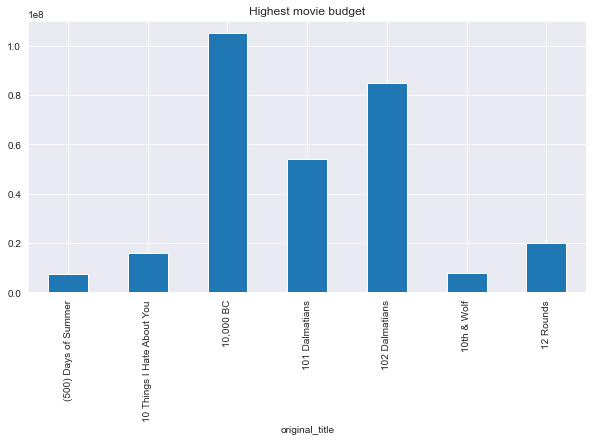

In [46]:
#lets see the movie that cost more to budget.
Movie_budget.plot(kind ='bar',title='Highest movie budget',x='original_title', y='budget', figsize= (10,5))

In [47]:
#lets get the mean revenue expenditure of each movie
movie_revenue=movieData.groupby(['original_title'])['revenue'].mean()[:5]
movie_revenue.head()

original_title
(500) Days of Summer           60722734.0
10 Things I Hate About You     53478166.0
10,000 BC                     266000000.0
101 Dalmatians                320689294.0
102 Dalmatians                183611771.0
Name: revenue, dtype: float64

<AxesSubplot:title={'center':'Highest movie revenue'}, xlabel='original_title'>

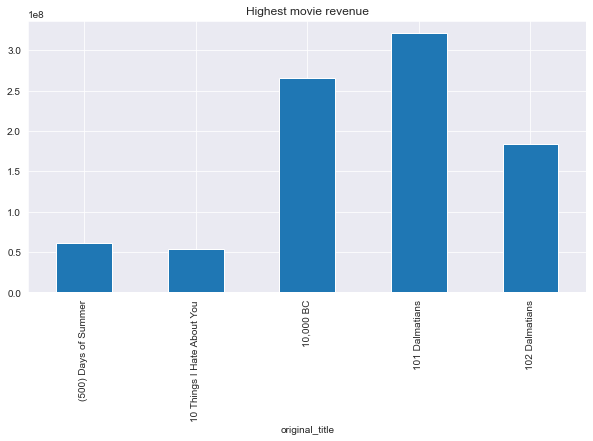

In [48]:
movie_revenue.plot(kind ='bar',title='Highest movie revenue',x='original_title', y='budget', figsize= (10,5))

- From our plot of the movie budget and revenue bar graph,we can say that,the budget does not really determine the revenue directly.

In [49]:
#Which movie had the maxium budget
movieData.loc[movieData['budget'].idxmax()]

id                                                    46528
original_title                            The Warrior's Way
genres            Adventure|Fantasy|Action|Western|Thriller
popularity                                          0.25054
release_year                                           2010
budget                                          425000000.0
revenue                                          11087569.0
Name: 2244, dtype: object

- The movie that cost more in terms of production was **The Warrior's Way** and the total budget was *425000000.0* with a returns of **11087569.0**

In [50]:
#Which movie had the maxium revenue
movieData.loc[movieData['revenue'].idxmax()]

id                                                   19995
original_title                                      Avatar
genres            Action|Adventure|Fantasy|Science Fiction
popularity                                        9.432768
release_year                                          2009
budget                                         237000000.0
revenue                                       2781505847.0
Name: 1386, dtype: object

The movie that had high returns was **Avatar** and the total budget was *237000000.0* which is even lower than the mean budget with returns of **2781505847.0** which higher than the mean revenue.

In [51]:
#Which movie has the most popularity
movieData.loc[movieData['popularity'].idxmax()]

id                                                   135397
original_title                               Jurassic World
genres            Action|Adventure|Science Fiction|Thriller
popularity                                        32.985763
release_year                                           2015
budget                                          150000000.0
revenue                                        1513528810.0
Name: 0, dtype: object

- From the the data above,the most popular movie among people is *Jurassic World*,it genre *Action|Adventure|Science Fiction|Thriller* and it was released in 2015.

In [52]:
#let find the most requested movie title
movieData['original_title'].value_counts()

Fair Game                                 2
Fright Night                              2
The Hills Have Eyes                       2
RoboCop                                   2
The Thing                                 2
                                         ..
Life in a Day                             1
X-Men: First Class                        1
Louis C.K.: Live at the Beacon Theater    1
Glee: The Concert Movie                   1
Fantastic Voyage                          1
Name: original_title, Length: 3808, dtype: int64

(array([898., 670., 536., 328., 313., 220.,  93., 165., 134., 108.,  51.,
         62.,  32.,  11.,  35.,  33.,  16.,  49.,  13.,  15.,  11.,   8.,
          5.,  21.,   4.,   2.,   3.,   1.,   1.,   8.,   3.,   1.,   1.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   1.]),
 array([1.00000000e+00, 8.50000098e+06, 1.70000010e+07, 2.55000009e+07,
        3.40000009e+07, 4.25000009e+07, 5.10000009e+07, 5.95000009e+07,
        6.80000008e+07, 7.65000008e+07, 8.50000008e+07, 9.35000008e+07,
        1.02000001e+08, 1.10500001e+08, 1.19000001e+08, 1.27500001e+08,
        1.36000001e+08, 1.44500001e+08, 1.53000001e+08, 1.61500001e+08,
        1.70000001e+08, 1.78500001e+08, 1.87000001e+08, 1.95500001e+08,
        2.04000001e+08, 2.12500000e+08, 2.21000000e+08, 2.29500000e+08,
        2.38000000e+08, 2.46500000e+08, 2.55000000e+08, 2.63500000e+08,
        2.72000000e+08, 2.80500000e+08, 2.89000000e+08, 2.97500000e+08,
        3.

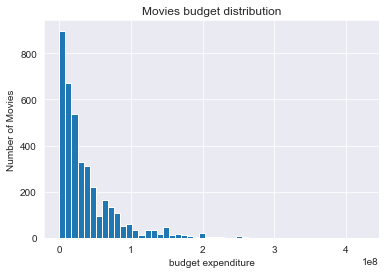

In [53]:
# x-axis
plt.xlabel('budget expenditure')
# y-axis
plt.ylabel('Number of Movies')
# Title of the histogram
plt.title('Movies budget distribution')
# Plot a histogram
plt.hist(movieData['budget'], bins = 50)

- Our buget gragh is skwed to the right,so it looks like more than the mean amount money was spent on the movie creation.

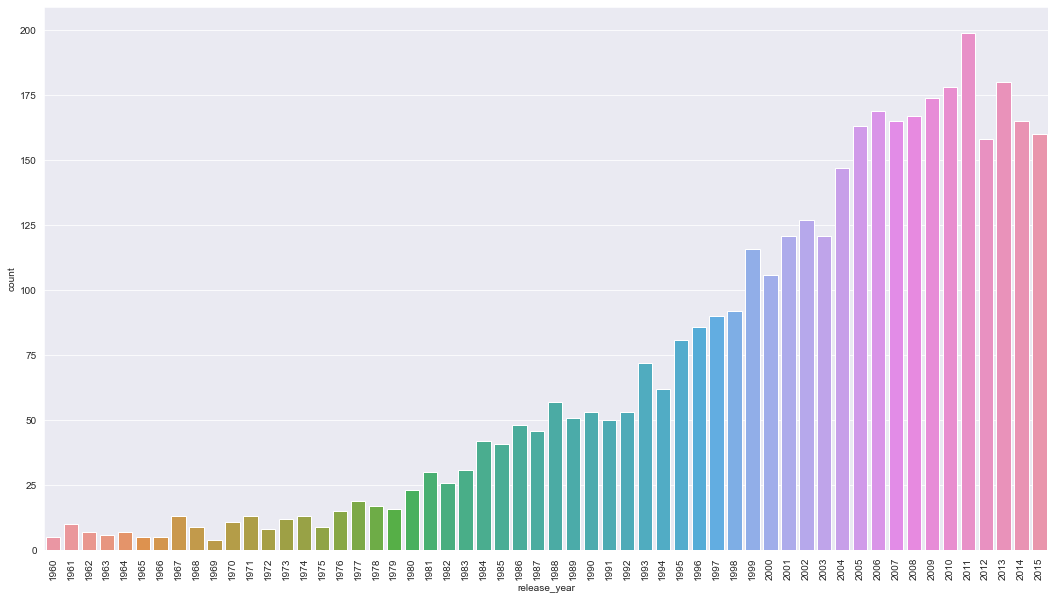

In [54]:
plt.figure(figsize=(18,10))
sns.countplot(movieData['release_year'])
sns.set_style("darkgrid")
plt.xticks(rotation = 90)
plt.show()

### Research Question 2 Which movie has the highest revenue? ###

In [55]:
#lets find the movie with the highest revenue 
highest_revenue = movieData.loc[movieData['revenue'].idxmax()]
highest_revenue.head()

id                                                   19995
original_title                                      Avatar
genres            Action|Adventure|Fantasy|Science Fiction
popularity                                        9.432768
release_year                                          2009
Name: 1386, dtype: object

- Avatar had the highest revenue and it was released in the year 2009,the total budget was *237000000.0* which is even lower than the mean budget with returns of **2781505847.0** which higher than the mean revenue.

### Research Question 3 What profit was made by the most popular movie? ###

In [56]:
Profit_movie=movieData.assign(profit_movie=movieData['revenue'] - movieData['budget'])
Profit_movie.head()

,id,original_title,genres,popularity,release_year,budget,revenue,profit_movie
0,135397,Jurassic World,Action|Adventure|Science Fiction|Thriller,32.985763,2015,150000000.0,1.513529e+09,1.363529e+09
1,76341,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,28.419936,2015,150000000.0,3.784364e+08,2.284364e+08
2,262500,Insurgent,Adventure|Science Fiction|Thriller,13.112507,2015,110000000.0,2.952382e+08,1.852382e+08
3,140607,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,11.173104,2015,200000000.0,2.068178e+09,1.868178e+09
4,168259,Furious 7,Action|Crime|Thriller,9.335014,2015,190000000.0,1.506249e+09,1.316249e+09


In [57]:
#lets see the statical distributon of our data.
Profit_movie.describe()

,id,popularity,release_year,budget,revenue,profit_movie
count,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3.854000e+03
mean,39888.185262,1.191554,2001.261028,3.720370e+07,1.076866e+08,7.048292e+07
std,67222.527399,1.475162,11.282575,4.220822e+07,1.765393e+08,1.506195e+08
min,5.000000,0.001117,1960.000000,1.000000e+00,2.000000e+00,-4.139124e+08
25%,6073.500000,0.462367,1995.000000,1.000000e+07,1.360003e+07,-1.321535e+06
50%,11321.500000,0.797511,2004.000000,2.400000e+07,4.480000e+07,2.002019e+07
75%,38573.250000,1.368324,2010.000000,5.000000e+07,1.242125e+08,8.170331e+07
max,417859.000000,32.985763,2015.000000,4.250000e+08,2.781506e+09,2.544506e+09


In [58]:
#the movie title that made the most profit.
Profit_movie.max()

id                               417859
original_title    ã‚¢ãƒƒãƒ—ãƒ«ã‚·ãƒ¼ãƒ‰
genres                 Western|Thriller
popularity                    32.985763
release_year                       2015
budget                      425000000.0
revenue                    2781505847.0
profit_movie               2544505847.0
dtype: object

- Most profitable move,made 2544505847.0 dollars as a return.

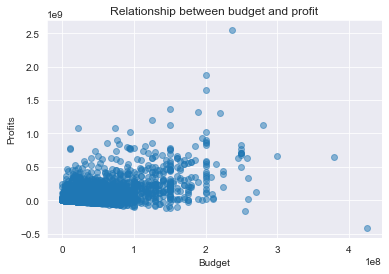

In [59]:
# x-axis
plt.xlabel('Budget')
# y-axis
plt.ylabel('Profits')
# Title of the histogram
plt.title('Relationship between budget and profit')
plt.scatter(Profit_movie['budget'],Profit_movie['profit_movie'], alpha=0.5)
plt.show()

- There is no much clear relationship between budget and the profit,in some case a loss was experienced 

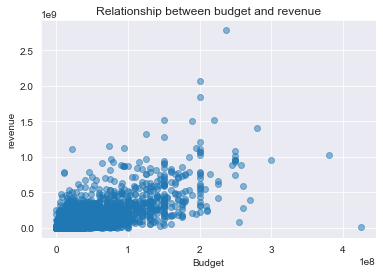

In [60]:
# x-axis
plt.xlabel('Budget')
# y-axis
plt.ylabel('revenue')
# Title of the histogram
plt.title('Relationship between budget and revenue')
plt.scatter(Profit_movie['budget'],Profit_movie['revenue'], alpha=0.5)
plt.show()

- There is no much clear relationship between budget and the revenue 

### Research Question 4 which genre is the most popular year by year? ###

In [61]:
#lets first sort our genre data
movieData.sort_values(by=['genres'], ascending=True)

,id,original_title,genres,popularity,release_year,budget,revenue
6763,13495,Alatriste,Action,0.500077,2006,24000000.0,23321954.0
5130,14527,Foolproof,Action,0.284861,2003,8256269.0,460978.0
5135,10923,Agent Cody Banks,Action,0.275184,2003,28000000.0,58795814.0
10364,15797,Only the Strong,Action,0.207999,1993,6000000.0,3283371.0
6229,9947,Elektra,Action,1.270018,2005,43000000.0,56681566.0
...,...,...,...,...,...,...,...
794,264656,The Homesman,Western|Drama,0.870104,2014,16000000.0,2429989.0
5,281957,The Revenant,Western|Drama|Adventure|Thriller,9.110700,2015,135000000.0,532950503.0
7371,14729,The Long Riders,Western|History,0.128234,1980,10000000.0,15795189.0
7031,10733,The Alamo,Western|History|War,0.948560,2004,145000000.0,25819961.0


In [62]:
#lets group our data to know which genre was released per year.
(df.assign(genres=df.genres.str.split(',\s*'))
   .explode('genres')
   .groupby(['release_year','genres']).size()
   .reset_index(name='counts')
)

,release_year,genres,counts
0,1960,Action|Adventure|Western,1
1,1960,Action|Drama|History,1
2,1960,Comedy|Drama|Romance,1
3,1960,Comedy|Romance,1
4,1960,Drama|Horror|Thriller,1
...,...,...,...
2719,2015,Thriller|Drama|Adventure|Action|History,1
2720,2015,Thriller|Horror,3
2721,2015,Thriller|Mystery,1
2722,2015,War|Adventure|Science Fiction,1


In [71]:
#let find the most requested genre(popular)
genre_count=movieData['genres'].value_counts()[ :5]
genre_count.head()

Drama                   245
Comedy                  233
Drama|Romance           107
Comedy|Romance          104
Comedy|Drama|Romance     91
Name: genres, dtype: int64

- From the result above,many people( 245) bought tickets to watch drama making it the **most popular genre.**<br>

- lets further break down the genres into individual and find out which genres was **popular each year.**

In [72]:
#lets separate the genres and group them per year
Sum_genres=movieData.groupby('release_year')['genres'].apply(lambda x: x.str.cat(sep='|')).apply(lambda x: x.split('|'))
Sum_genres.head()

release_year
1960    [Drama, Horror, Thriller, Action, Adventure, W...
1961    [Adventure, Animation, Comedy, Family, Comedy,...
1962    [Adventure, Action, Thriller, Adventure, Drama...
1963    [Action, Thriller, Adventure, Horror, Comedy, ...
1964    [Adventure, Action, Thriller, Drama, Comedy, W...
Name: genres, dtype: object

In [74]:
#let find out how many genre per group were released each year.
genres_stat=Sum_genres.apply(lambda x:stats.mode(x)).reset_index()
genres_stat.head()

,release_year,genres
0,1960,"([Drama], [3])"
1,1961,"([Drama], [6])"
2,1962,"([Drama], [5])"
3,1963,"([Drama], [3])"
4,1964,"([Drama], [4])"


In [75]:
#let create different columns for frequency per genre for easy plotting
genres_stat['genre_group'] = genres_stat['genres'].apply(lambda x: ''.join(x[0]))
genres_stat['freq'] = genres_stat['genres'].apply(lambda x: ''.join(x[1].astype(str)))
genres_stat['freq'] = genres_stat['freq'].astype(int)
genres_stat.head()

,release_year,genres,genre_group,freq
0,1960,"([Drama], [3])",Drama,3
1,1961,"([Drama], [6])",Drama,6
2,1962,"([Drama], [5])",Drama,5
3,1963,"([Drama], [3])",Drama,3
4,1964,"([Drama], [4])",Drama,4


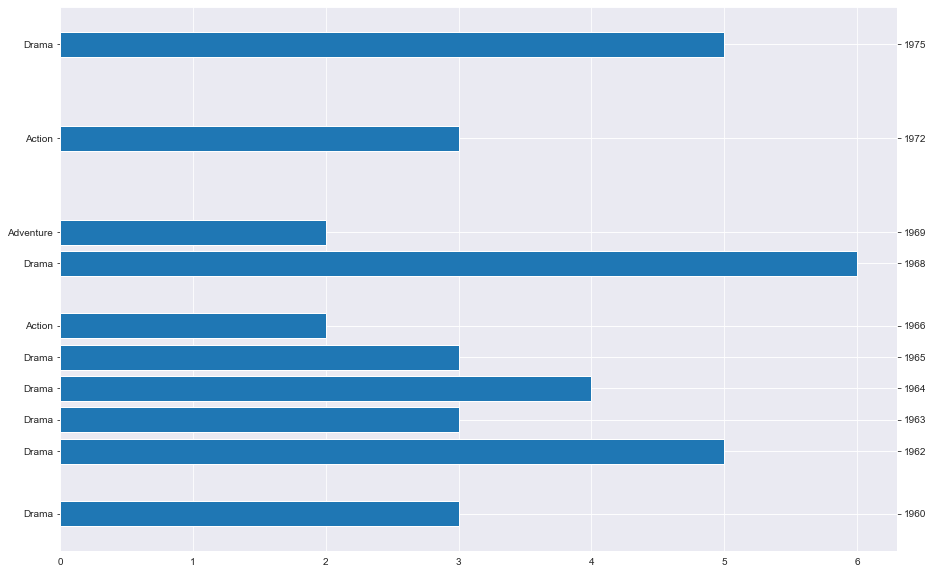

In [79]:
df_plot=genres_stat.sort_values('freq').head(10)
fig,ax = plt.subplots(figsize=(15,10))
ax.barh(df_plot.release_year,df_plot.freq)
ax.set_yticks(df_plot.release_year)
ax.set_yticklabels(df_plot.genre_group)

df_plot2= ax.twinx()
df_plot2.barh(df_plot.release_year,df_plot.freq)
df_plot2.set_yticks(df_plot.release_year)
df_plot2.set_yticklabels(df_plot.release_year)
plt.show()

- From our above bar plot,we can still confirm for sure that **drama is the most popular genre each year.**

### let visualise our top five genres in a bar graph
genre_count.plot(kind ='bar',title='Genre count',x='Genre', y='count', figsize= (10,5))

Text(0, 0.5, 'Expenditure')

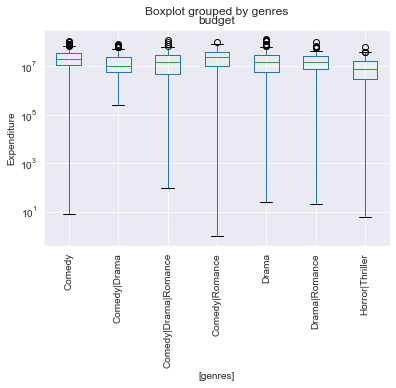

In [51]:
#Lets see the variation in the bugget expenditure of each genre.
genres_sort=movieData.groupby(['genres'])[['id']].count().sort_values(by=['id'],ascending=False)[0:7]
genres_plot=movieData[movieData['genres'].isin(genres_sort.index.values.tolist())]
genres_plot.boxplot(column=['budget'],by=['genres'],rot=90).set_yscale('log')
plt.ylabel("Expenditure")

**From our box plot**
- The expenditure on the **comedy** was evenly distributed around the mean budget.<br>
- For the **drama**,the most of its expenditure were a little lower than the mean compared to the comedy
- We can also tell that a movie that combined,comedy,drama and romance spent a little less,most of its budget were below the mean budget.

In [56]:
#calculate sum of buget for each genre(first ten)
genre_budget=df.groupby('genres')['budget'].sum()[:10]
genre_budget.head()

genres
Action                                               1.211756e+09
Action|Adventure                                     3.115000e+08
Action|Adventure|Animation|Family|Fantasy            1.300000e+08
Action|Adventure|Animation|Family|Science Fiction    9.200000e+07
Action|Adventure|Animation|Science Fiction           3.500000e+06
Name: budget, dtype: float64

<AxesSubplot:title={'center':'Top genre budget'}, xlabel='genres'>

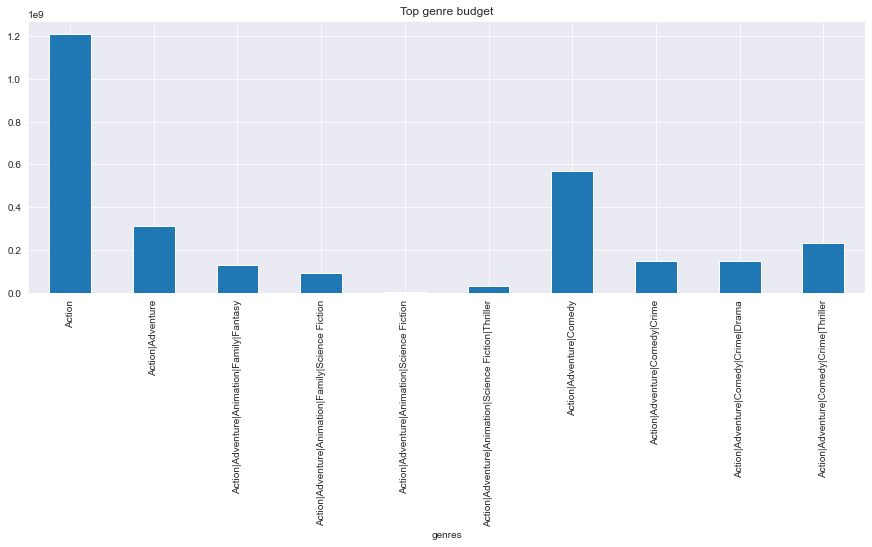

In [57]:
#lets view our data above in a bar graph.
genre_budget.plot(kind ='bar',title='Top genre budget',x='genres', y='budget', figsize= (15,5))

- From our bar graph,we can say as much *drama* is the most popular genre,*action* as genre, costed more interms of budget expenditure.

### Research Question 5  what profit was made from the popular genres?
$Profit = revenue-buget$

In [35]:
#lets have a subset data that contains only the poppular genre'drama'
drama_budget = df[df["genres"].isin(["Drama"])]
drama_budget.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
55,295964,2.584264,20000000.0,36606743.0,Burnt,Bradley Cooper|Sienna Miller|Lily James|Alicia...,John Wells,100,Drama,10/2/15,631,6.3,2015,1.839999e+07,3.367819e+07
58,306819,2.557859,15000000.0,64191523.0,The Danish Girl,Eddie Redmayne|Alicia Vikander|Matthias Schoen...,Tom Hooper,120,Drama,11/27/15,867,7.3,2015,1.379999e+07,5.905618e+07
68,312221,2.331567,35000000.0,137935567.0,Creed,Michael B. Jordan|Sylvester Stallone|Graham Mc...,Ryan Coogler,133,Drama,11/25/15,1171,7.3,2015,3.219999e+07,1.269007e+08
77,321741,2.121884,35000000.0,48623572.0,Concussion,Will Smith|Bitsie Tulloch|Gugu Mbatha-Raw|Alec...,Peter Landesman,123,Drama,11/12/15,500,6.9,2015,3.219999e+07,4.473367e+07
96,298382,1.823130,11930000.0,18340000.0,The Dressmaker,Kate Winslet|Liam Hemsworth|Caroline Goodall|J...,Jocelyn Moorhouse,118,Drama,10/1/15,197,6.9,2015,1.097560e+07,1.687279e+07


In [36]:
#lets select the raws we will need for genre analysis
dramaData = drama_budget[['id',
                          'genres', 
                          'release_year',
                          'budget', 
                          'revenue']]
dramaData.head()

,id,genres,release_year,budget,revenue
55,295964,Drama,2015,20000000.0,36606743.0
58,306819,Drama,2015,15000000.0,64191523.0
68,312221,Drama,2015,35000000.0,137935567.0
77,321741,Drama,2015,35000000.0,48623572.0
96,298382,Drama,2015,11930000.0,18340000.0


In [48]:
#in order to get the total drama was released per year,lets group our data.
dramaData.groupby(['release_year']).count()

,id,genres,budget,revenue
release_year,,,,
1961,1,1,1,1
1962,2,2,2,2
1966,1,1,1,1
1969,1,1,1,1
1971,1,1,1,1
1975,2,2,2,2
1976,2,2,2,2
1979,2,2,2,2
1980,1,1,1,1


- From our result above,we get know that,most of the drama movies were produced in the year 2014.

In [37]:
#lets get the mean revenue expenditure of drama genre(most popular genre)
dramaData.groupby(['genres'])['revenue'].mean()

genres
Drama    5.826490e+07
Name: revenue, dtype: float64

In [38]:
#lets create a column for our profits
profit_genre = dramaData.assign(profit_drama = dramaData['revenue'] - dramaData['budget'])
profit_genre.head()

,id,genres,release_year,budget,revenue,profit_drama
55,295964,Drama,2015,20000000.0,36606743.0,16606743.0
58,306819,Drama,2015,15000000.0,64191523.0,49191523.0
68,312221,Drama,2015,35000000.0,137935567.0,102935567.0
77,321741,Drama,2015,35000000.0,48623572.0,13623572.0
96,298382,Drama,2015,11930000.0,18340000.0,6410000.0


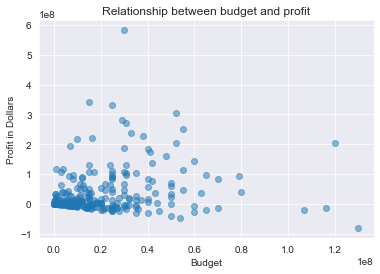

In [39]:
# x-axis
plt.xlabel('Budget')
# y-axis
plt.ylabel('Profit in Dollars')
# Title of the histogram
plt.title('Relationship between budget and profit')
plt.scatter(profit_genre['budget'], profit_genre['profit_drama'], alpha=0.5)
plt.show()

-From the scatter graph we can see,in few cases,the buget that was spent in the creating of the drama affeccted it profit in a positive manner.

In [58]:
#lets get details for drama with the most profit.
profit_genre.max()

id                   343795
genres                Drama
release_year           2015
budget          130000000.0
revenue         611899420.0
profit_drama    581899420.0
dtype: object

-The most profit made from popular genre(drama) was 581899420.0 dollar

In [42]:
#lets find the genre that made the most profit generally
Profit_movie.max()

id                               417859
original_title    ã‚¢ãƒƒãƒ—ãƒ«ã‚·ãƒ¼ãƒ‰
genres                 Western|Thriller
popularity                    32.985763
release_year                       2015
budget                      425000000.0
revenue                    2781505847.0
profit_movie               2544505847.0
dtype: object

- Genre that made most profit of all was '*Western|Thriller*'

### Research Question 6  what is the maximun movies runtime and its effect to votes counts ?

In [43]:
#let select few subset of data that we will need to analyse the runtime
runtimeData= df[['original_title',
                 'genres',
                 'runtime',
                 'vote_count']]
runtimeData.head()

,original_title,genres,runtime,vote_count
0,Jurassic World,Action|Adventure|Science Fiction|Thriller,124,5562
1,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,120,6185
2,Insurgent,Adventure|Science Fiction|Thriller,119,2480
3,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,136,5292
4,Furious 7,Action|Crime|Thriller,137,2947


In [44]:
#lets find statical distribution of our runtime data
runtimeData.describe()

,runtime,vote_count
count,3854.000000,3854.000000
mean,109.220291,527.720291
std,19.922820,879.956821
min,15.000000,10.000000
25%,95.000000,71.000000
50%,106.000000,204.000000
75%,119.000000,580.000000
max,338.000000,9767.000000


- From the above data we can easily tell the maximum movies runtime is 338.000000

Text(0.5, 1.0, 'Relationship between runtime and vote_count')

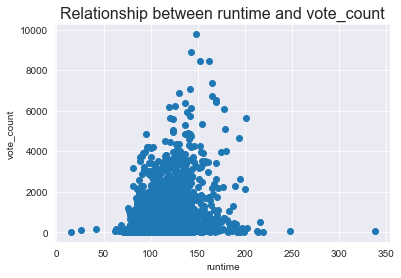

In [50]:
plt.scatter(runtimeData.runtime,runtimeData.vote_count)
plt.xlabel('runtime')
plt.ylabel('vote_count')
plt.title('Relationship between runtime and vote_count', fontsize= 16)

- We can say that the runtime of a movies some how affects its vote count cause our graph is a little skewed to the left.

In [45]:
#lets find the runtime for moive with highest vote count
runtimeData.max()

original_title    ã‚¢ãƒƒãƒ—ãƒ«ã‚·ãƒ¼ãƒ‰
genres                 Western|Thriller
runtime                             338
vote_count                         9767
dtype: object

(array([  1.,   1.,   0.,   0.,   1.,   0.,   0.,   3.,   5.,  31., 196.,
        437., 598., 653., 475., 458., 305., 243., 141., 117.,  49.,  47.,
         21.,  23.,   9.,  10.,  10.,   8.,   6.,   0.,   2.,   2.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 15.  ,  21.46,  27.92,  34.38,  40.84,  47.3 ,  53.76,  60.22,
         66.68,  73.14,  79.6 ,  86.06,  92.52,  98.98, 105.44, 111.9 ,
        118.36, 124.82, 131.28, 137.74, 144.2 , 150.66, 157.12, 163.58,
        170.04, 176.5 , 182.96, 189.42, 195.88, 202.34, 208.8 , 215.26,
        221.72, 228.18, 234.64, 241.1 , 247.56, 254.02, 260.48, 266.94,
        273.4 , 279.86, 286.32, 292.78, 299.24, 305.7 , 312.16, 318.62,
        325.08, 331.54, 338.  ]),
 <BarContainer object of 50 artists>)

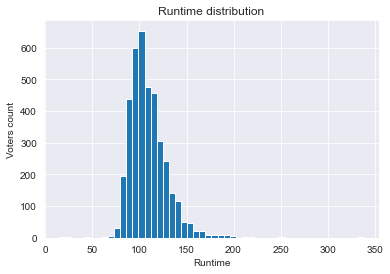

In [46]:
# x-axis
plt.xlabel('Runtime')
# y-axis
plt.ylabel('Voters count')
# Title of the histogram
plt.title('Runtime distribution')
# Plot a histogram
plt.hist(runtimeData['runtime'], bins = 50)

- The runtime is normally distributed from the mean runtime,and can also say that runtime of movie also affects it's votes count,the higher the rumtime the more the votes count.

<a id='conclusions'></a>
## Conclusions
The average budget that was used for the movie creation was **3.720370e+07 dollar** and the  average revenue achieved regardless of the budget spent was **1.076866e+08 dollar**.<br>
For future movie creation,focus should be put creation of movies under the genre such as **drama,comedy and thrillers.**



<a id='Limitation'></a>
## Limitations
The above data was analysed with the summation that the cash was given in dollars,an the result above has not been proven and therefore the recommendations given might not be somethind to go by.
	

<a id='conclusions'></a>
## Reference
[https://www.w3schools.com/python/pandas/ref_df_max.asp#:~:text=The%20max()%20method%20returns,maximum%20value%20for%20each%20row.]
[https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/]
[https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pow.html]
[https://www.youtube.com/watch?v=ZjQCPMO7LBE]
